## Packages installations and imports
(Run this section to ensure smooth operation for the Notebook)

In [ ]:
pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
import keras_tuner as kt
import os

## Overview Dataset

1. Data Structure and Import

In [ ]:
import gdown

gdown.download_folder("https://drive.google.com/drive/folders/19DLS6ZrfsxVq4IrRycPKrtt1TQanV9Em?usp=sharing", quiet=False, use_cookies=False)

Retrieving folder contents


Processing file 1tswGuA4JAO_fX8yQKlUTZoaXvHpeYnp8 meta_train.csv
Processing file 1Cz6q_m9fpAFePRZV6Ca2vMya4XvZDamX test_images.zip
Processing file 1tp1F1Xora43V5Ks3IjRaw40V3iAC6Wm2 train_images.zip


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1tswGuA4JAO_fX8yQKlUTZoaXvHpeYnp8
To: /content/data/meta_train.csv
100%|██████████| 335k/335k [00:00<00:00, 95.0MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Cz6q_m9fpAFePRZV6Ca2vMya4XvZDamX
From (redirected): https://drive.google.com/uc?id=1Cz6q_m9fpAFePRZV6Ca2vMya4XvZDamX&confirm=t&uuid=d21eafdb-704c-42f1-bf5d-b5bd7043e3c3
To: /content/data/test_images.zip
100%|██████████| 274M/274M [00:05<00:00, 50.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1tp1F1Xora43V5Ks3IjRaw40V3iAC6Wm2
From (redirected): https://drive.google.com/uc?id=1tp1F1Xora43V5Ks3IjRaw40V3iAC6Wm2&confirm=t&uuid=0645e9f7-a06d-4f62-bd3a-53501360c07a
To: /content/data/train_images.zip
100%|██████████| 820M/820M [00:14<00:00, 56.5MB/s]
Download completed


['/content/data/meta_train.csv',
 '/content/data/test_images.zip',
 '/content/data/train_images.zip']

In [ ]:
import zipfile
with zipfile.ZipFile('data/train_images.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [ ]:
with zipfile.ZipFile('data/test_images.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [ ]:
data = pd.read_csv('data/meta_train.csv')

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


In [ ]:
data['age'] = data['age'].astype('object')
data.describe(include='object')

,image_id,label,variety,age
count,10407,10407,10407,10407
unique,10407,10,10,18
top,110381.jpg,normal,ADT45,70
freq,1,1764,6992,3077


2. Check for Duplicated Data

In [ ]:
print(data.isnull().sum())
print(data.duplicated().sum())

image_id    0
label       0
variety     0
age         0
dtype: int64
0


3. Checking the distribution of the classification targets

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'ADT45'),
  Text(1, 0, 'IR20'),
  Text(2, 0, 'KarnatakaPonni'),
  Text(3, 0, 'Onthanel'),
  Text(4, 0, 'Ponni'),
  Text(5, 0, 'Surya'),
  Text(6, 0, 'Zonal'),
  Text(7, 0, 'AndraPonni'),
  Text(8, 0, 'AtchayaPonni'),
  Text(9, 0, 'RR')])

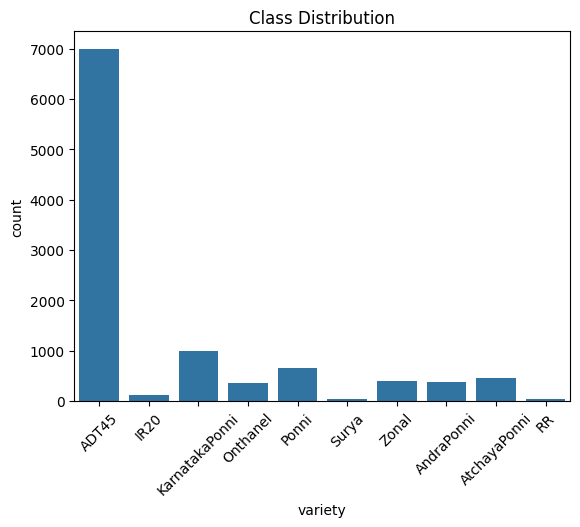

In [ ]:
# Variety feature distribution graph
import seaborn as sns
sns.countplot(data=data, x='variety')
plt.title("Class Distribution")
plt.xticks(rotation=45)

In [ ]:
# Count for each variety class
data["variety"].value_counts()

variety
ADT45             6992
KarnatakaPonni     988
Ponni              657
AtchayaPonni       461
Zonal              399
AndraPonni         377
Onthanel           351
IR20               114
RR                  36
Surya               32
Name: count, dtype: int64

In [ ]:
# Check for image resolution of given dataset as well as all images' format
from PIL import Image
from collections import Counter
from pathlib import Path

train_dir = "data/train_images"

# Traverse all subdirectories (classes)
image_sizes = []
image_formats = []

# Loop to go through all disease classes within the train_images folder
# and its images to collect image resolution and format
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)
            try:
                with Image.open(image_path) as img:
                    image_sizes.append(img.size)
                    image_formats.append(img.format)  # Add format into image_formats array
            except Exception as e:
                print(f"Error reading {image_path}: {e}")

# Image sizes summary
size_counts = Counter(image_sizes)
print("Most common image sizes:")
for size, count in size_counts.most_common():
    print(f"{size}: {count} images")

# Image formats summary
format_counts = Counter(image_formats)
print("\nMost common image formats:")
for fmt, count in format_counts.most_common():
    print(f"{fmt}: {count} images")

Most common image sizes:
(480, 640): 10403 images
(640, 480): 4 images

Most common image formats:
JPEG: 10407 images


In [ ]:
# Data_augmentation
import random
from tensorflow.keras import layers
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomBrightness(0.2),
    layers.RandomZoom(height_factor=0.2, width_factor=0.2),
])

In [ ]:
# Normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

## Preparing Data

1. Load image with label for Task 2

In [ ]:
import shutil
original_base = "data/train_images"

# Copy files to new structure based on label
for _, row in data.iterrows():
    image_id = row['image_id']
    label = row['label']
    variety = row['variety']

    # Source path (e.g., train/bacterial_leaf_blight/100.jpg)
    src_path = os.path.join(original_base, label, image_id)

    # Destination path (e.g., train_data_task_2/bacterial_rice/100.jpg)
    target_dir = os.path.join("data/train_images_task_2", variety)
    dst_path = os.path.join(target_dir, image_id)

    # Create target folder if needed
    os.makedirs(target_dir, exist_ok=True)

    # Copy file
    if os.path.exists(src_path):
        shutil.copy2(src_path, dst_path)
    else:
        print(f"WARNING: Missing file: {src_path}")

print("Copying complete. Files organized in data/train_data_task_2/")

Copying complete. Files organized in data/train_data_task_2/


In [ ]:
# Set your source and destination directories
source_dir = 'external_data'
destination_dir = 'unlabeled_data'

# Make sure the destination exists
os.makedirs(destination_dir, exist_ok=True)

# Walk through all subdirectories
for dirpath, dirnames, filenames in os.walk(source_dir):
    for file in filenames:
        src = os.path.join(dirpath, file)
        dst = os.path.join(destination_dir, file)

        # Avoid overwriting: rename if file already exists
        base, ext = os.path.splitext(file)
        counter = 1
        while os.path.exists(dst):
            dst = os.path.join(destination_dir, f"{base}_{counter}{ext}")
            counter += 1

        shutil.copy2(src, dst)

In [ ]:
full_dataset_task2 = tf.keras.preprocessing.image_dataset_from_directory(
    './data/train_images_task_2',
    image_size=(224, 224),  # size of image
    label_mode='categorical',
    shuffle=True,
)

train_dataset_task2 = full_dataset_task2.take(int(0.8 * len(full_dataset_task2))).prefetch(tf.data.AUTOTUNE).cache()
val_dataset_task2 = full_dataset_task2.skip(int(0.8 * len(full_dataset_task2))).prefetch(tf.data.AUTOTUNE).cache()

# Preview the dataset
for images, labels in train_dataset_task2.take(1):
    print(images.shape)
    print(labels.shape)

for images, labels in val_dataset_task2.take(1):
    print(images.shape)
    print(labels.shape)

print(full_dataset_task2.class_names)


Found 10407 files belonging to 10 classes.
(32, 224, 224, 3)
(32, 10)


2025-05-16 12:08:46.414636: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-16 12:08:46.416143: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(32, 224, 224, 3)
(32, 10)
['ADT45', 'AndraPonni', 'AtchayaPonni', 'IR20', 'KarnatakaPonni', 'Onthanel', 'Ponni', 'RR', 'Surya', 'Zonal']


2025-05-16 12:08:47.147691: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-05-16 12:08:47.149521: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2. Load test dataset for evaluation purposes

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    'data/test_images',
    labels=None,                  # No labels needed for prediction
    image_size=(224, 224),
    batch_size=32,
    shuffle=False
)

Found 3469 files.


## Training Models

- Build base models and function to build all models

In [ ]:
# Build base models
from tensorflow.keras.applications import EfficientNetB0, MobileNet, Xception
from tensorflow.keras import models, optimizers
from tensorflow.keras import regularizers
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

base_EfficientNetB0_model_task_2 = EfficientNetB0(
    input_shape=(224, 224, 3),
    include_top=False,          # Exclude the final classification layer
    weights=None                # No pretrained weights
)

base_MobileNet_model_task_2 = MobileNet(
    input_shape=(224, 224, 3),
    include_top=False,          # Exclude the final classification layer
    weights=None                # No pretrained weights
)

base_Xception_model_task_2 = Xception(
    input_shape=(224, 224, 3),
    include_top=False,          # Exclude the final classification layer
    weights=None                # No pretrained weights
)

In [ ]:
# Function to build all models
def build_EfficientNetB0_model_task_2(hp):
    model = tf.keras.Sequential([
          data_augmentation,
          normalization_layer,
          base_EfficientNetB0_model_task_2,
          tf.keras.layers.GlobalAveragePooling2D(),
          tf.keras.layers.Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu'),
          tf.keras.layers.Dropout(hp.Float('dropout_rate', 0.3, 0.6, step=0.1)),
          tf.keras.layers.Dense(10, activation='softmax')
    ])

    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def build_MobileNet_model_task_2(hp):
    model = tf.keras.Sequential([
          data_augmentation,
          normalization_layer,
          base_MobileNet_model_task_2,
          tf.keras.layers.GlobalAveragePooling2D(),
          tf.keras.layers.Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu'),
          tf.keras.layers.Dropout(hp.Float('dropout_rate', 0.3, 0.6, step=0.1)),
          tf.keras.layers.Dense(10, activation='softmax')
    ])

    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def build_Xception_model_task_2(hp):
    model = tf.keras.Sequential([
          data_augmentation,
          normalization_layer,
          base_Xception_model_task_2,
          tf.keras.layers.GlobalAveragePooling2D(),
          tf.keras.layers.Dense(hp.Int('dense_units', 64, 256, step=64), activation='relu'),
          tf.keras.layers.Dropout(hp.Float('dropout_rate', 0.3, 0.6, step=0.1)),
          tf.keras.layers.Dense(10, activation='softmax')
    ])

    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


- Setting up tuner for all models

In [ ]:
# Setup all tuners for all models
EfficientNetB0_task_2_tuner = kt.RandomSearch(
    build_EfficientNetB0_model_task_2,
    objective='val_accuracy',  # Or 'val_loss' depending on the goal
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='data/tuning/EfficientNetB0',  # Directory to store the results
    project_name='EfficientNetB0_tuning'  # Name of the project
)

MobileNet_task_2_tuner = kt.RandomSearch(
    build_MobileNet_model_task_2,
    objective='val_accuracy',  # Or 'val_loss' depending on the goal
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='data/tuning/MobileNet',  # Directory to store the results
    project_name='MobileNet_tuning'  # Name of the project
)

Xception_task_2_tuner = kt.RandomSearch(
    build_Xception_model_task_2,
    objective='val_accuracy',  # Or 'val_loss' depending on the goal
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='data/tuning/Xception',  # Directory to store the results
    project_name='Xception_tuning'  # Name of the project
)


Reloading Tuner from data/tuning/EfficientNetB0/EfficientNetB0_tuning/tuner0.json
Reloading Tuner from data/tuning/MobileNet/MobileNet_tuning/tuner0.json
Reloading Tuner from data/tuning/Xception/Xception_tuning/tuner0.json


- EarlyStop and ReduceLROnPlateau function

In [ ]:
early_stop_model_task_2 = EarlyStopping(
    monitor='val_loss',
    patience=6,
    restore_best_weights=True)

reduce_lr_model_task_2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,
    verbose=1
)

In [ ]:
EfficientNetB0_task_2_tuner.search(train_dataset_task2, validation_data=val_dataset_task2, epochs=50, callbacks=[early_stop_model_task_2, reduce_lr_model_task_2])

Trial 10 Complete [00h 27m 43s]
val_accuracy: 0.9880210757255554

Best val_accuracy So Far: 0.9880210757255554
Total elapsed time: 03h 10m 20s


In [ ]:
# Track the best model:
best_EfficientNetB0_model_task_2 = EfficientNetB0_task_2_tuner.get_best_models(1)[0]
best_EfficientNetB0_model_task_2.summary()
best_EfficientNetB0_model_task_2.save('best_EfficientNetB0_model_task_2.keras')

# Print best hyperparameters:
best_EfficientNetB0_task_2_hp = EfficientNetB0_task_2_tuner.get_best_hyperparameters(1)[0]
print(best_EfficientNetB0_task_2_hp.values)

/home/herom/lintf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 432 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,214,829 (16.08 MB)

 Trainable params: 4,172,806 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

{'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.002674245296397919}


In [ ]:
EfficientNetB0_task_2_tuner.results_summary()

Results summary
Results in data/tuning/EfficientNetB0/EfficientNetB0_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 09 summary
Hyperparameters:
dense_units: 128
dropout_rate: 0.4
learning_rate: 0.002674245296397919
Score: 0.9880210757255554

Trial 06 summary
Hyperparameters:
dense_units: 192
dropout_rate: 0.3
learning_rate: 0.0003271739205768162
Score: 0.9856253266334534

Trial 07 summary
Hyperparameters:
dense_units: 192
dropout_rate: 0.3
learning_rate: 0.005231079312062187
Score: 0.985146164894104

Trial 08 summary
Hyperparameters:
dense_units: 64
dropout_rate: 0.3
learning_rate: 0.0011188068573940516
Score: 0.9846670031547546

Trial 04 summary
Hyperparameters:
dense_units: 192
dropout_rate: 0.5
learning_rate: 0.007216386468332445
Score: 0.9817920327186584

Trial 05 summary
Hyperparameters:
dense_units: 64
dropout_rate: 0.5
learning_rate: 0.003207075122396239
Score: 0.9774796366691589

Trial 03 summary
Hyperparameters:
dense_units: 64
dropout_rat

In [ ]:
MobileNet_task_2_tuner.search(train_dataset_task2, validation_data=val_dataset_task2, epochs=50, callbacks=[early_stop_model_task_2, reduce_lr_model_task_2])

Trial 10 Complete [00h 08m 08s]
val_accuracy: 0.978917121887207

Best val_accuracy So Far: 0.9813128709793091
Total elapsed time: 01h 52m 08s


In [ ]:
# Track the best model:
best_MobileNet_model_task_2 = MobileNet_task_2_tuner.get_best_models(1)[0]
best_MobileNet_model_task_2.summary()
best_MobileNet_model_task_2.save('best_MobileNet_model_task_2.keras')

# Print best hyperparameters:
best_MobileNet_task_2_hp = MobileNet_task_2_tuner.get_best_hyperparameters(1)[0]
print(best_MobileNet_task_2_hp.values)

/home/herom/lintf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 172 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,361,354 (12.82 MB)

 Trainable params: 3,339,466 (12.74 MB)

 Non-trainable params: 21,888 (85.50 KB)

{'dense_units': 128, 'dropout_rate': 0.4, 'learning_rate': 0.0061589692802230585}


In [ ]:
MobileNet_task_2_tuner.results_summary()

Results summary
Results in data/tuning/MobileNet/MobileNet_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
dense_units: 128
dropout_rate: 0.4
learning_rate: 0.0061589692802230585
Score: 0.9813128709793091

Trial 09 summary
Hyperparameters:
dense_units: 64
dropout_rate: 0.4
learning_rate: 0.0002470371231253561
Score: 0.978917121887207

Trial 07 summary
Hyperparameters:
dense_units: 128
dropout_rate: 0.5
learning_rate: 0.0007158523446965609
Score: 0.9774796366691589

Trial 03 summary
Hyperparameters:
dense_units: 256
dropout_rate: 0.4
learning_rate: 0.00016002789506967393
Score: 0.9765213131904602

Trial 05 summary
Hyperparameters:
dense_units: 192
dropout_rate: 0.5
learning_rate: 0.00023747115131631685
Score: 0.9755629897117615

Trial 04 summary
Hyperparameters:
dense_units: 256
dropout_rate: 0.3
learning_rate: 0.004824642245001809
Score: 0.9755629897117615

Trial 06 summary
Hyperparameters:
dense_units: 256
dropout_rate: 

In [ ]:
Xception_task_2_tuner.search(train_dataset_task2, validation_data=val_dataset_task2, epochs=50, callbacks=[early_stop_model_task_2, reduce_lr_model_task_2])

Trial 9 Complete [00h 44m 50s]
val_accuracy: 0.987541913986206

Best val_accuracy So Far: 0.9880210757255554
Total elapsed time: 05h 36m 25s

Search: Running Trial #10

Value             |Best Value So Far |Hyperparameter
64                |128               |dense_units
0.3               |0.3               |dropout_rate
0.00014326        |0.00037297        |learning_rate

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.8911 - loss: 0.3717 - val_accuracy: 0.9593 - val_loss: 0.1374 - learning_rate: 0.0010
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 77s 294ms/step - accuracy: 0.9757 - loss: 0.0792 - val_accuracy: 0.8903 - val_loss: 0.3904 - learning_rate: 0.0010
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 76s 293ms/step - accuracy: 0.9776 - loss: 0.0764 - val_accuracy: 0.9593 - val_loss: 0.2045 - learning_rate: 0.0010
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 77s 295ms/step - accuracy: 0.9831 - loss: 0.0593 - val_accuracy: 0.9569 - val_loss: 0.2063 - learning_rate: 0.0010
Epoc

KeyboardInterrupt: 

In [ ]:
# Track the best model:
best_Xception_model_task_2 = Xception_task_2_tuner.get_best_models(1)[0]
best_Xception_model_task_2.summary()
best_Xception_model_task_2.save('best_Xception_model_task_2.keras')

# Print best hyperparameters:
best_Xception_task_2_hp = Xception_task_2_tuner.get_best_hyperparameters(1)[0]
print(best_Xception_task_2_hp.values)

/home/herom/lintf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 318 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,125,042 (80.59 MB)

 Trainable params: 21,070,514 (80.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

{'dense_units': 128, 'dropout_rate': 0.3, 'learning_rate': 0.0003729693459063402}


In [ ]:
Xception_task_2_tuner.results_summary()

Results summary
Results in data/tuning/Xception/Xception_tuning
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 03 summary
Hyperparameters:
dense_units: 128
dropout_rate: 0.3
learning_rate: 0.0003729693459063402
Score: 0.9880210757255554

Trial 08 summary
Hyperparameters:
dense_units: 256
dropout_rate: 0.4
learning_rate: 0.001407297559094673
Score: 0.987541913986206

Trial 02 summary
Hyperparameters:
dense_units: 128
dropout_rate: 0.3
learning_rate: 0.002864353203357012
Score: 0.9832295179367065

Trial 07 summary
Hyperparameters:
dense_units: 256
dropout_rate: 0.4
learning_rate: 0.0003523143529494313
Score: 0.9832295179367065

Trial 06 summary
Hyperparameters:
dense_units: 192
dropout_rate: 0.4
learning_rate: 0.004323277710281546
Score: 0.9726880788803101

Trial 01 summary
Hyperparameters:
dense_units: 256
dropout_rate: 0.3
learning_rate: 0.0003155802451216674
Score: 0.9688548445701599

Trial 00 summary
Hyperparameters:
dense_units: 192
dropout_rate: 0.5
l

## Evaluation and Final Training Session

1. Build all functions to calculate F1 and F1 per class

In [ ]:
def extract_labels_and_preds(model, dataset):
    y_true = []
    y_pred = []

    for images, labels in dataset:
        preds = model.predict(images, verbose=0)
        y_true.append(labels.numpy())
        y_pred.append(preds)

    y_true = np.concatenate(y_true)
    y_pred = np.concatenate(y_pred)

    return y_true, y_pred

In [ ]:
from sklearn.metrics import f1_score

def evaluate_f1(model, val_dataset, average='macro'):
    y_true, y_pred = extract_labels_and_preds(model, val_dataset)

    # Convert one-hot encoded labels to class indices
    y_true = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    return f1_score(y_true, y_pred_classes, average=average)

In [ ]:
from sklearn.metrics import classification_report

def evaluate_f1_per_class(model, val_dataset, target_names=None):
    y_true, y_pred = extract_labels_and_preds(model, val_dataset)

    # Convert one-hot labels to class indices
    y_true = np.argmax(y_true, axis=1)
    y_pred_classes = np.argmax(y_pred, axis=1)

    report = classification_report(
        y_true,
        y_pred_classes,
        target_names=target_names,
        digits=4
    )
    print(report)


In [ ]:
# Import different models for evaluation
from tensorflow.keras.models import load_model

best_EfficientNetB0_model_task_2 = load_model("best_EfficientNetB0_model_task_2.keras")
best_MobileNet_model_task_2 = load_model("best_MobileNet_model_task_2.keras")
best_Xception_model_task_2 = load_model("best_Xception_model_task_2.keras")


/home/herom/lintf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 172 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/home/herom/lintf/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 318 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


2. Calculate F1 Score for all models

In [ ]:
print("F1 Score of EfficientNetB0 model: ", evaluate_f1(best_EfficientNetB0_model_task_2, val_dataset_task2))

F1 Score of EfficientNetB0 model:  0.9790484458295902


In [ ]:
print("F1 Score of MobileNet model: ",evaluate_f1(best_MobileNet_model_task_2, val_dataset_task2))

F1 Score of MobileNet model:  0.9776366617283478


In [ ]:
print("F1 Score of Xception model: ",evaluate_f1(best_Xception_model_task_2, val_dataset_task2))

F1 Score of Xception model:  0.9869619001219713


2025-05-14 23:15:41.273561: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


3. Calculate F1 Score per class for all models

In [ ]:
evaluate_f1_per_class(best_EfficientNetB0_model_task_2, val_dataset_task2)

              precision    recall  f1-score   support

           0     0.9958    0.9965    0.9961      1420
           1     1.0000    1.0000    1.0000        72
           2     1.0000    0.9884    0.9942        86
           3     1.0000    1.0000    1.0000        24
           4     0.9948    0.9948    0.9948       194
           5     0.9846    0.9552    0.9697        67
           6     0.9919    1.0000    0.9959       122
           7     0.9167    0.9167    0.9167        12
           8     0.8571    1.0000    0.9231         6
           9     1.0000    1.0000    1.0000        84

    accuracy                         0.9947      2087
   macro avg     0.9741    0.9852    0.9790      2087
weighted avg     0.9948    0.9947    0.9947      2087



In [ ]:
evaluate_f1_per_class(best_MobileNet_model_task_2, val_dataset_task2)

              precision    recall  f1-score   support

           0     0.9923    0.9986    0.9954      1420
           1     1.0000    0.9861    0.9930        72
           2     1.0000    1.0000    1.0000        86
           3     1.0000    1.0000    1.0000        24
           4     0.9948    0.9845    0.9896       194
           5     1.0000    0.9403    0.9692        67
           6     0.9833    0.9672    0.9752       122
           7     1.0000    0.9167    0.9565        12
           8     1.0000    0.8333    0.9091         6
           9     0.9767    1.0000    0.9882        84

    accuracy                         0.9923      2087
   macro avg     0.9947    0.9627    0.9776      2087
weighted avg     0.9924    0.9923    0.9923      2087



In [ ]:
evaluate_f1_per_class(best_Xception_model_task_2, val_dataset_task2)

              precision    recall  f1-score   support

           0     0.9951    1.0000    0.9975      1420
           1     1.0000    1.0000    1.0000        72
           2     1.0000    0.9884    0.9942        86
           3     1.0000    1.0000    1.0000        24
           4     1.0000    1.0000    1.0000       194
           5     1.0000    0.9552    0.9771        67
           6     1.0000    0.9836    0.9917       122
           7     1.0000    1.0000    1.0000        12
           8     1.0000    0.8333    0.9091         6
           9     1.0000    1.0000    1.0000        84

    accuracy                         0.9966      2087
   macro avg     0.9995    0.9761    0.9870      2087
weighted avg     0.9967    0.9966    0.9966      2087



4. Calculate Prediction Latency for all models

In [ ]:
import time
def calculate_prediction_time(model, dataset):
  # Warm-up Run
  for batch in dataset.take(1):
      _ = model.predict(batch, verbose=0)

  # Measure Prediction Time
  start = time.time()
  total_images = 0

  for batch in dataset:
      _ = model.predict(batch, verbose=0)
      total_images += batch.shape[0]

  end = time.time()

  # Results
  total_time = end - start
  per_image_time = (total_time / total_images) * 1000  # in ms

  print(f"Predicted {total_images} images in {total_time:.2f} seconds")
  print(f"Average prediction time per image: {per_image_time:.2f} ms")

In [ ]:
calculate_prediction_time(final_Xception_model_task_2,test_dataset)

Predicted 3469 images in 12.08 seconds
Average prediction time per image: 3.48 ms


2025-05-15 23:25:35.581938: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
calculate_prediction_time(best_EfficientNetB0_model_task_2,test_dataset)

I0000 00:00:1747326296.190529   21429 cuda_dnn.cc:529] Loaded cuDNN version 90300


Predicted 3469 images in 9.13 seconds
Average prediction time per image: 2.63 ms


2025-05-15 23:25:05.591099: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
calculate_prediction_time(best_MobileNet_model_task_2,test_dataset)

Predicted 3469 images in 6.70 seconds
Average prediction time per image: 1.93 ms


5. Train final chosen model

In [ ]:
#  Train the final model chosen
final_Xception_model_task_2_history = best_Xception_model_task_2.fit(train_dataset_task2, validation_data=val_dataset_task2, epochs=30, callbacks=[early_stop_model_task_2, reduce_lr_model_task_2])

Epoch 1/30


I0000 00:00:1747372182.770265   48962 cuda_dnn.cc:529] Loaded cuDNN version 90300


260/260 ━━━━━━━━━━━━━━━━━━━━ 92s 302ms/step - accuracy: 0.9939 - loss: 0.0180 - val_accuracy: 0.9966 - val_loss: 0.0086 - learning_rate: 6.2500e-05
Epoch 2/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 74s 285ms/step - accuracy: 0.9957 - loss: 0.0177 - val_accuracy: 0.9938 - val_loss: 0.0103 - learning_rate: 6.2500e-05
Epoch 3/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 74s 285ms/step - accuracy: 0.9933 - loss: 0.0147 - val_accuracy: 0.9947 - val_loss: 0.0102 - learning_rate: 6.2500e-05
Epoch 4/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 74s 286ms/step - accuracy: 0.9965 - loss: 0.0085 - val_accuracy: 0.9952 - val_loss: 0.0103 - learning_rate: 6.2500e-05
Epoch 5/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - accuracy: 0.9947 - loss: 0.0108
Epoch 5: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.
260/260 ━━━━━━━━━━━━━━━━━━━━ 72s 276ms/step - accuracy: 0.9947 - loss: 0.0108 - val_accuracy: 0.9952 - val_loss: 0.0116 - learning_rate: 6.2500e-05
Epoch 6/30
260/260 ━━━━━━━━━━━━━━━━━━━━ 72s 276ms/step - accura

In [ ]:
# Save the final model for prediction use
best_Xception_model_task_2.save('final_Xception_model_task_2.keras')

6. Plot the final model's training session

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy', model_name='None'):
    epochs = range(1, len(train_loss) + 1)

    plt.figure(figsize=(14, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title(f'Training and Validation Loss - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy or Other Metric
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_metric, 'bo-', label=f'Training {metric_name}')
    plt.plot(epochs, val_metric, 'ro-', label=f'Validation {metric_name}')
    plt.title(f'Training and Validation {metric_name} - {model_name}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_name)
    plt.legend()

    plt.tight_layout()
    plt.show()

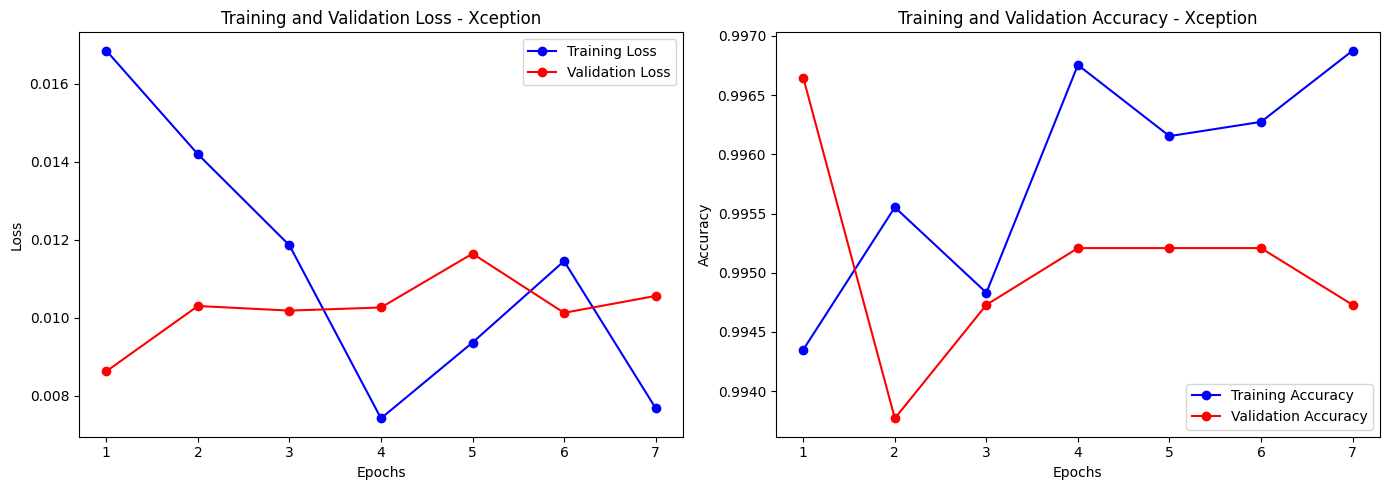

In [ ]:
plot_learning_curve(final_Xception_model_task_2_history.history['loss'], final_Xception_model_task_2_history.history['val_loss'],
                    final_Xception_model_task_2_history.history['accuracy'], final_Xception_model_task_2_history.history['val_accuracy'],
                    metric_name='Accuracy', model_name="Xception")